In [1]:
import warnings;
warnings.filterwarnings('ignore');

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib as mpl

In [3]:
df=pd.read_csv("transfusion.data")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df=df.rename(columns = {'Recency (months)':'Recency','Frequency (times)':'Frequency','Monetary (c.c. blood)':'CCBlood','Time (months)':'Time','whether he/she donated blood in March 2007':'Target'})

#### Logically - It makes sense that the frequency of blood donation is going to be directly proportional to the CCBlood that has been donated till date by a person. This is because at any given time a person can only donate a single pint of blood.

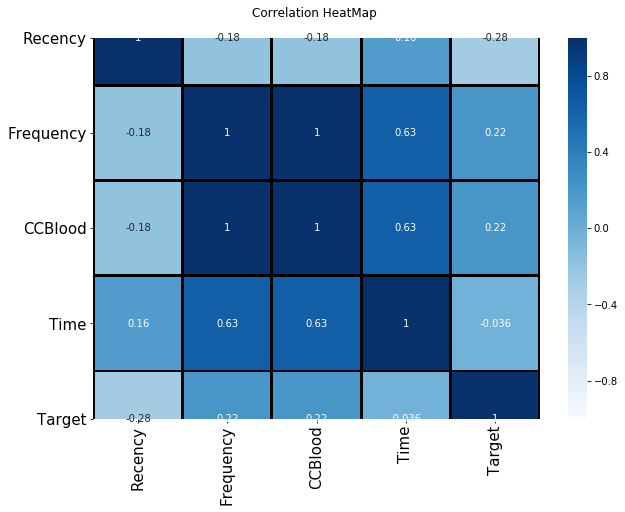

In [7]:
plt.figure(figsize=(10,7))
sn.heatmap(df.corr(),annot=True,cmap = 'Blues',vmin=-1,vmax=1,center=0,linewidths=2, linecolor='black')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.title('Correlation HeatMap \n ')
plt.show()

In [8]:
df.groupby(['Target']).mean()

,Recency,Frequency,CCBlood,Time
Target,,,,
0,10.771930,4.801754,1200.438596,34.770175
1,5.455056,7.797753,1949.438202,32.719101


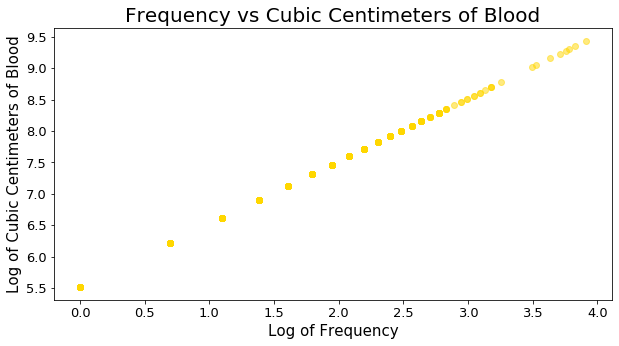

In [9]:
plt.figure(figsize=(10,5))
plt.title('Frequency vs Cubic Centimeters of Blood',fontsize=20)
plt.scatter(np.log(df.Frequency),np.log(df['CCBlood']),alpha=0.5,c='gold')
plt.xlabel("Log of Frequency",fontsize=15)
plt.ylabel("Log of Cubic Centimeters of Blood",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


### Dropping the monetary column

In [10]:
df=df.drop('CCBlood',axis=1)

In [11]:
d={'0':0,'1':1}
def diction(x):
    if x==0:
        d['0']+=1
    else:
        d['1']+=1
    return

In [12]:
df['Target'].apply(diction)

0      None
1      None
2      None
3      None
4      None
       ... 
743    None
744    None
745    None
746    None
747    None
Name: Target, Length: 748, dtype: object

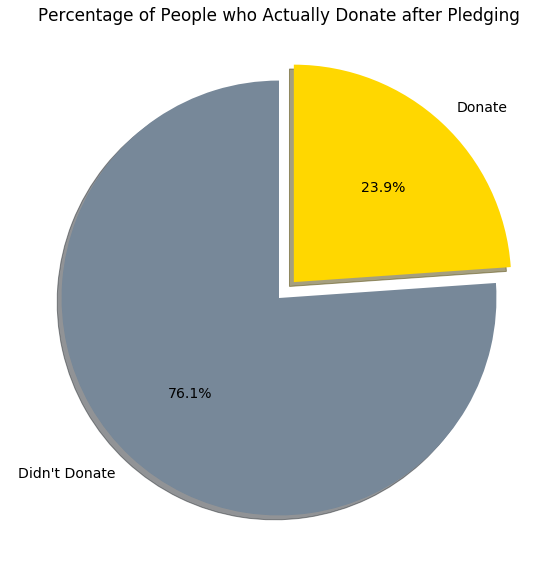

In [13]:
fig,ax=plt.subplots(figsize=(20,10))
plt.rcParams['font.size'] = 14.0
ax.pie(list(d.values()),labels=["Didn't Donate","Donate"],startangle=90,autopct='%1.1f%%',explode=(0,0.1),shadow=True,colors=('Lightslategray','Gold'))
plt.title('Percentage of People who Actually Donate after Pledging')
plt.show()

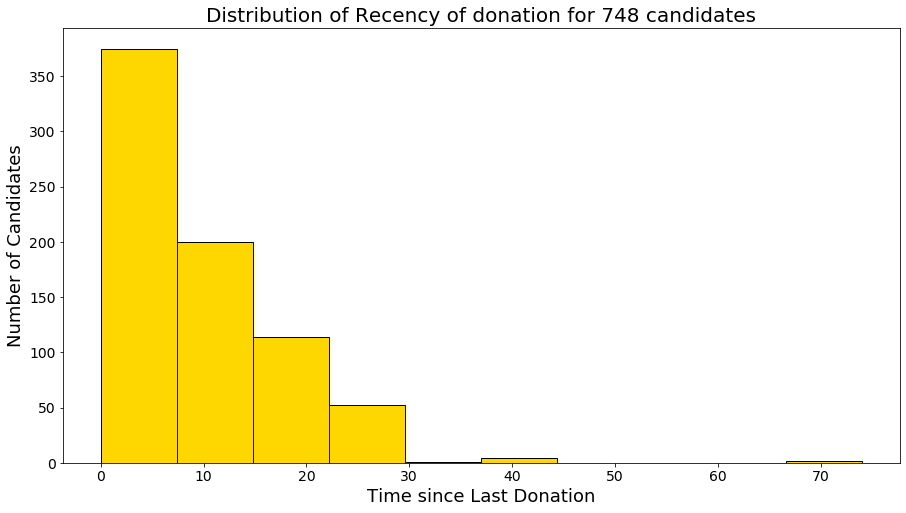

In [14]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Recency of donation for 748 candidates',fontsize=20)
plt.hist(df['Recency'],color='Gold',edgecolor='black')
plt.xlabel('Time since Last Donation',fontsize=18)
plt.ylabel('Number of Candidates',fontsize=18)
plt.show()

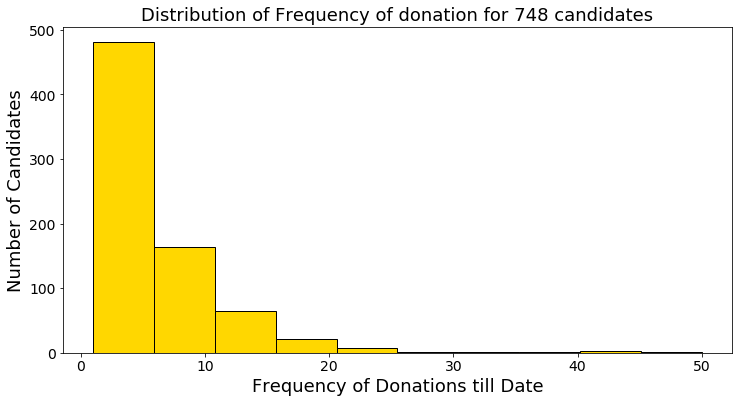

In [15]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Frequency of donation for 748 candidates',fontsize=18)
plt.hist(df.Frequency,color='gold',edgecolor='black')
plt.xlabel('Frequency of Donations till Date',fontsize=18)
plt.ylabel('Number of Candidates',fontsize=18)
plt.show()

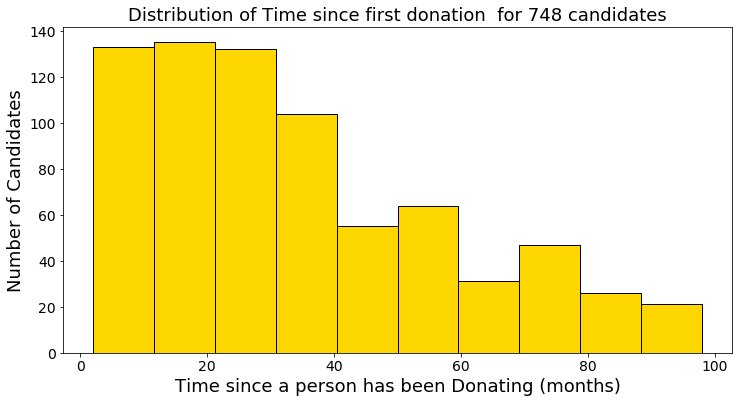

In [16]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Time since first donation  for 748 candidates',fontsize=18)
plt.hist(df.Time,color='gold',edgecolor='black')
plt.xlabel('Time since a person has been Donating (months)',fontsize=18)
plt.ylabel('Number of Candidates',fontsize=18)
plt.show()

In [17]:
# Creating a new Column - Frequency of Donations per Annum
df['freqPerAnnum']=df['Frequency'][df['Time']>=12]/df['Time'][df['Time']>=12]
df['freqPerAnnum']

0      0.510204
1      0.464286
2      0.457143
3      0.444444
4      0.311688
         ...   
743    0.052632
744    0.038462
745    0.048387
746    0.025641
747    0.013889
Name: freqPerAnnum, Length: 748, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency         748 non-null int64
Frequency       748 non-null int64
Time            748 non-null int64
Target          748 non-null int64
freqPerAnnum    615 non-null float64
dtypes: float64(1), int64(4)
memory usage: 29.3 KB


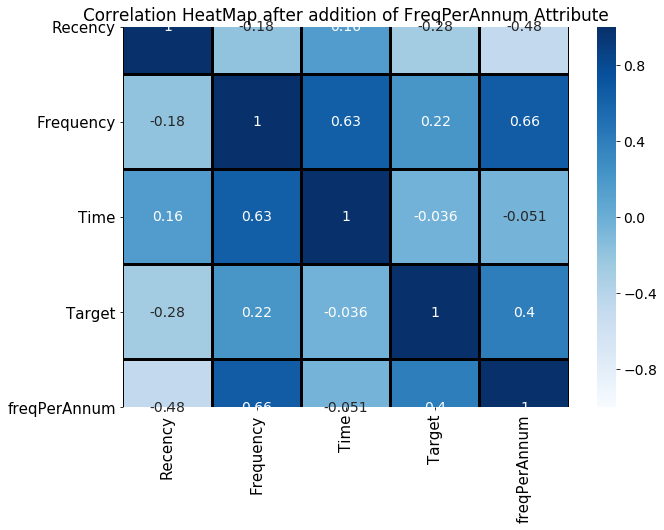

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(df.corr(),annot=True,cmap = 'Blues',vmin=-1,vmax=1,center=0,linewidths=2, linecolor='black')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.title('Correlation HeatMap after addition of FreqPerAnnum Attribute')
plt.show()

#### As can be seen from the information above - 133 people are new to blood donations/pledged recently; so no assumption for them can be made considering the freqPerAnnum column

### Trying to test if it is possible to generally predict willingness of donation from a person's data if he/she has signed up recently

In [20]:
df2=df[df.freqPerAnnum.isnull()==True]
df2=df2.reset_index()
df2=df2.drop('index',axis=1)
df2=df2.drop('freqPerAnnum',axis=1)
df2

,Recency,Frequency,Time,Target
0,4,4,4,0
1,0,3,4,0
2,2,5,11,1
3,2,3,4,1
4,2,3,4,1
...,...,...,...,...
128,11,1,11,0
129,11,1,11,0
130,11,1,11,0
131,11,1,11,1


#### Splitting data set in 70:30 ratio for Train and Test

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df2[['Recency','Frequency','Time']],df2['Target'],random_state=30,test_size=0.3)

#### Logistic Regression Model-The only Regression model used for Classification

In [22]:
classify=GridSearchCV(LogisticRegression(),{'C':[0.1]})
print(classify.get_params)
classify=classify.fit(x_train,y_train)
print('Logistic Regression Train Score: ',classify.score(x_train, y_train))
print('Logistic Regression Test Score: ',classify.score(x_test, y_test))
print(classification_report(y_test,classify.predict(x_test)))

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>
Logistic Regression Train Score:  0.7526881720430108
Logistic Regression Test Score:  0.7
              precision    recall  f1-score   support

           

C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Stochastic Gradient Descent Classifier

In [23]:
classify2=SGDClassifier(alpha=10)
print(classify2.get_params)
classify2=classify2.fit(x_train,y_train)
print('Train Score: ',classify2.score(x_train, y_train))
print('Test Score: ',classify2.score(x_test, y_test))
print(classification_report(y_test,classify2.predict(x_test)))

<bound method BaseEstimator.get_params of SGDClassifier(alpha=10, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
Train Score:  0.7526881720430108
Test Score:  0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



#### Support Vector Machine

In [24]:
classify3=GridSearchCV(LinearSVC(C=0.8,dual=False),{'C':[0.001]})
classify3=classify3.fit(x_train,y_train)
print('Train Score: ',classify3.score(x_train, y_train))
print('Test Score: ',classify3.score(x_test, y_test))
print(classification_report(y_test,classify3.predict(x_test)))

C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train Score:  0.7526881720430108
Test Score:  0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



#### KNN Classifier

In [25]:
classify4=KNeighborsClassifier(n_neighbors=3)
classify4.fit(x_train, y_train)
print('Train Score: ',classify4.score(x_train, y_train))
print('Test Score: ',classify4.score(x_test, y_test))
print(classification_report(y_test,classify4.predict(x_test)))

Train Score:  0.7526881720430108
Test Score:  0.7
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.50      0.42      0.45        12

    accuracy                           0.70        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.69      0.70      0.69        40



#### Random Forest Classifier

In [26]:
classify5=RandomForestClassifier(n_estimators=300,max_depth=0.1)
print(classify5.get_params)
classify5=classify5.fit(x_train,y_train)
print('Train Score: ',classify5.score(x_train, y_train))
print('Test Score: ',classify5.score(x_test, y_test))
print(classification_report(y_test,classify5.predict(x_test)))

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=0.1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>
Train Score:  0.7526881720430108
Test Score:  0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



#### ADA Boost Classifier

In [27]:
classify6=AdaBoostClassifier(n_estimators=300,learning_rate=0.2)
print(classify6.get_params)
classify6=classify6.fit(x_train,y_train)
print('Train Score: ',classify6.score(x_train, y_train))
print('Test Score: ',classify6.score(x_test, y_test))
print(classification_report(y_test,classify6.predict(x_test)))

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=300, random_state=None)>
Train Score:  0.7956989247311828
Test Score:  0.7
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1       0.50      0.25      0.33        12

    accuracy                           0.70        40
   macro avg       0.62      0.57      0.57        40
weighted avg       0.66      0.70      0.66        40



### KNN is the best Model in this case

### Predictions for People who have been donating for a reasonable amount of time (atleast a year)

In [28]:
df3=df[df.freqPerAnnum.isnull()==False]

In [29]:
df3=df3.reset_index()
df3=df3.drop('index',axis=1)

In [30]:
df3

,Recency,Frequency,Time,Target,freqPerAnnum
0,2,50,98,1,0.510204
1,0,13,28,1,0.464286
2,1,16,35,1,0.457143
3,2,20,45,1,0.444444
4,1,24,77,0,0.311688
...,...,...,...,...,...
610,23,2,38,0,0.052632
611,21,2,52,0,0.038462
612,23,3,62,0,0.048387
613,39,1,39,0,0.025641


#### Splitting data set in 70:30 ratio for Train and Test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(df3[['Recency','Frequency','Time','freqPerAnnum']],df3['Target'],random_state=30,test_size=0.3)

#### Logistic Regression Model-The only regression model used for classification

In [32]:
classify=GridSearchCV(LogisticRegression(),{'C':[10]})
print(classify.get_params)
classify=classify.fit(x_train,y_train)
print('Logistic Regression Train Score: ',classify.score(x_train, y_train))
print('Logistic Regression Test Score: ',classify.score(x_test, y_test))
print(classification_report(y_test,classify.predict(x_test)))

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>
Logistic Regression Train Score:  0.7930232558139535
Logistic Regression Test Score:  0.8
              precision    recall  f1-score   support

           0

#### Stochastic Gradient Descent Classifier

In [33]:
classify2=SGDClassifier(alpha=0.01)
print(classify2.get_params)
classify2=classify2.fit(x_train,y_train)
print('Train Score: ',classify2.score(x_train, y_train))
print('Test Score: ',classify2.score(x_test, y_test))
print(classification_report(y_test,classify2.predict(x_test)))

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
Train Score:  0.7813953488372093
Test Score:  0.7405405405405405
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       138
           1       0.45      0.11      0.17        47

    accuracy                           0.74       185
   macro avg       0.61      0.53      0.51       185
weighted avg       0.68      0.74      0.67       185



#### Support  Vector Machine

In [34]:
classify3=GridSearchCV(LinearSVC(C=0.8,dual=False),{'C':[10]})
classify3=classify3.fit(x_train,y_train)
print('Train Score: ',classify3.score(x_train, y_train))
print('Test Score: ',classify3.score(x_test, y_test))
print(classification_report(y_test,classify3.predict(x_test)))

Train Score:  0.7906976744186046
Test Score:  0.8
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       138
           1       0.92      0.23      0.37        47

    accuracy                           0.80       185
   macro avg       0.85      0.61      0.63       185
weighted avg       0.82      0.80      0.75       185



#### KNN Classifier

In [35]:
classify4=KNeighborsClassifier()
classify4.fit(x_train, y_train)
print('Train Score: ',classify3.score(x_train, y_train))
print('Test Score: ',classify3.score(x_test, y_test))
print(classification_report(y_test,classify4.predict(x_test)))

Train Score:  0.7906976744186046
Test Score:  0.8
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       138
           1       0.73      0.34      0.46        47

    accuracy                           0.80       185
   macro avg       0.77      0.65      0.67       185
weighted avg       0.79      0.80      0.77       185



### Random Forest Classifier

In [36]:
classify5=RandomForestClassifier(n_estimators=300,max_depth=2.9)
print(classify5.get_params)
classify5=classify5.fit(x_train,y_train)
print('Train Score: ',classify5.score(x_train, y_train))
print('Test Score: ',classify5.score(x_test, y_test))
print(classification_report(y_test,classify5.predict(x_test)))

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2.9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>
Train Score:  0.8093023255813954
Test Score:  0.7891891891891892
              precision    recall  f1-score   support

           0       0.79      0.99      0.87       138
           1       0.83      0.21      0.34        47

    accuracy                           0.79       185
   macro avg       0.81      0.60      0.61       185
weighted avg       0.80      0.79      0.74       185



### ADA Boost Classifier

In [37]:
classify6=AdaBoostClassifier(n_estimators=300,learning_rate=0.02)
print(classify6.get_params)
classify6=classify6.fit(x_train,y_train)
print('Train Score: ',classify6.score(x_train, y_train))
print('Test Score: ',classify6.score(x_test, y_test))
print(classification_report(y_test,classify6.predict(x_test)))

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=300, random_state=None)>
Train Score:  0.8116279069767441
Test Score:  0.7891891891891892
              precision    recall  f1-score   support

           0       0.79      0.99      0.87       138
           1       0.83      0.21      0.34        47

    accuracy                           0.79       185
   macro avg       0.81      0.60      0.61       185
weighted avg       0.80      0.79      0.74       185



### Stochastic Gradient Descent Classifier is the best model in this case